In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.pipeline import Pipeline


In [ ]:
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test.csv')


In [ ]:
print("Train Data Info:")
print(train.info())
print("\nTest Data Info:")
print(test.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entri


Target Variable Distribution:
y
no     37104
yes     2896
Name: count, dtype: int64


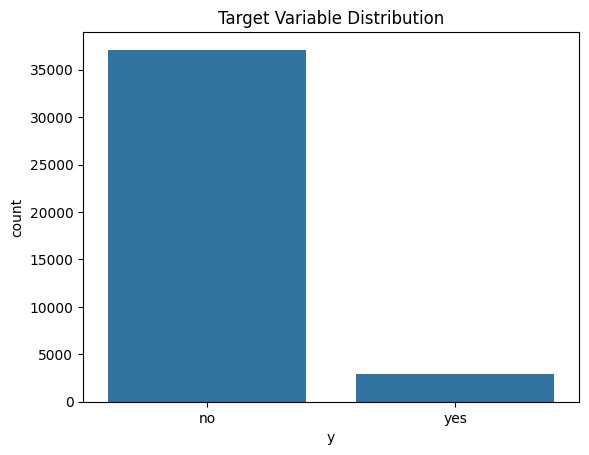

In [ ]:
print("\nTarget Variable Distribution:")
print(train['y'].value_counts())
sns.countplot(data=train, x='y')
plt.title("Target Variable Distribution")
plt.show()

In [ ]:
print("\nMissing Values in Train:")
print(train.isnull().sum())
print("\nMissing Values in Test:")
print(test.isnull().sum())



Missing Values in Train:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Missing Values in Test:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
train[categorical_cols] = train[categorical_cols].fillna('unknown')
train[numerical_cols] = train[numerical_cols].fillna(train[numerical_cols].median())

In [ ]:
train['y'] = train['y'].map({'yes': 1, 'no': 0})

In [ ]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
X = train.drop('y', axis=1)
y = train['y']

In [ ]:
combined = pd.concat([X, test], keys=['train', 'test'])

In [ ]:
combined.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
cat_cols = combined.select_dtypes(include=['object']).columns
num_cols = combined.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Building the Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fitting the Model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_valid)
print("\nValidation Metrics:")
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))



Validation Metrics:
Accuracy: 0.937625
F1 Score: 0.423121387283237
Confusion Matrix:
 [[7318  103]
 [ 396  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7421
           1       0.64      0.32      0.42       579

    accuracy                           0.94      8000
   macro avg       0.79      0.65      0.70      8000
weighted avg       0.93      0.94      0.93      8000



In [ ]:
test_data_transformed = test.drop('id', axis=1, errors='ignore')  # Assuming `id` column exists for identification
test_predictions = pipeline.predict(test_data_transformed)


In [ ]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
test_predictions = pipeline.predict(test)

# Convert numerical predictions (0/1) to categorical ('no'/'yes')
test['y'] = ['yes' if pred == 1 else 'no' for pred in test_predictions]

# Now create the submission DataFrame
submission = test[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                   'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'y']]

# Optionally, set 'index' name for the submission file
submission.index.name = 'index'

# Save the submission file
submission.to_csv('6962.csv', index=True)

print("\nSubmission file '6962.csv' created successfully.")



Submission file '6962.csv' created successfully.


In [ ]:
y=pd.read_csv("/content/6962.csv")

In [ ]:
y

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown,no
1,1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure,no
2,2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure,no
3,3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown,no
4,4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,5206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
5207,5207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
5208,5208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
5209,5209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
